## This is a classification model creating using real life dataset from kaggle. 
#### Data Source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset 

## About Dataset:
### Context 
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease. There are 1025 data entities in the data table.
### Content
#### Attribute Information:
    1.age(age in years)
    2.sex(1 = male; 0 = female)
    3.chest pain type (4 values 0=25%,1=50%,2=75%,3=100%, min=0,max=100)
    4.resting blood pressure in mm Hg on admission to the hospital (Min=94,25%=120,50%=130,75%=140,Max=200)
    5.serum cholestoral in mg/dl (126=Min,211=25%,240=50%,275=75%,564=Max)
    6.fasting blood sugar > 120 mg/dl
    7.resting electrocardiographic results (values 0,1,2)
    8.maximum heart rate achieved (71=Min,132=25%,152=50%,166=75%,202=Max)
    9.exercise induced angina
    10.oldpeak = ST depression induced by exercise relative to rest (1 = yes; 0 = no)
    11.the slope of the peak exercise ST segment
    12.number of major vessels (0-3) colored by flourosopy
    13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Imports and Settings
 Here numpy, pandas libraries are used for database manupulation,
 matplotlib,seaborn libraries are used for data visualization and,
 scikit-learn library is used for machine leaning model creation,evaluation.

In [1]:
import numpy as np
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from sklearn import datasets # for using built-in datasets
from sklearn import metrics # for checking the model accuracy
#To plot the graph embedded in the notebook
%matplotlib inline

## loading dataset named "heart.csv"

In [2]:
heart_df=pd.read_csv('heart.csv')
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Preprocessing

In [4]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Since there is no missing value and the 0 value is used in various reason in the dataset which is essential and there is no abnormal data inside the dataframe so we did not need to delete any column from the dataset. For better understanding different class is labled instead of values.

In [5]:
#heart_df["target"]=heart_df["target"].replace([0,1],["no disease","disease"])
#heart_df["sex"]=heart_df["sex"].replace([0,1],["female","male"])
#heart_df["cp"]=heart_df["cp"].replace([0,1,2,3],["no pain","mild pain","moderate pain","severe pain"])
#heart_df["thal"]=heart_df["thal"].replace([0,1,2],["normal","fixed defect","reversable defect"])



## Exploratory Data Analysis

In [6]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### checking for bias

In [7]:
heart_df.groupby("target").size()

target
0    499
1    526
dtype: int64

Since the number of no disease and disease are not equal but the difference is very small.There might be very negligible bias toward having diabetes.

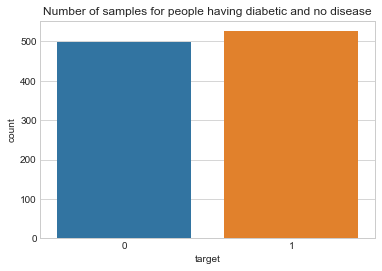

In [8]:
# let's visualise the number of samples for each class with count plot
sns.countplot(x='target', data=heart_df)
plt.title("Number of samples for people having diabetic and no disease");

* Next, letʼs make a correlation matrix to quantitatively examine the relationship between variables.
* If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.
* The correlation matrix can be formed by using the corr function from the pandas library.
* The correlation coefficient ranges from -1 to 1 . If the value is close to 1 , it means that there is a strong positive correlation between the two variables. When it is close to -1 , the variables have a strong negative correlation.
* Then, we will use the heatmap function from the seaborn library to plot the correlation matrix.

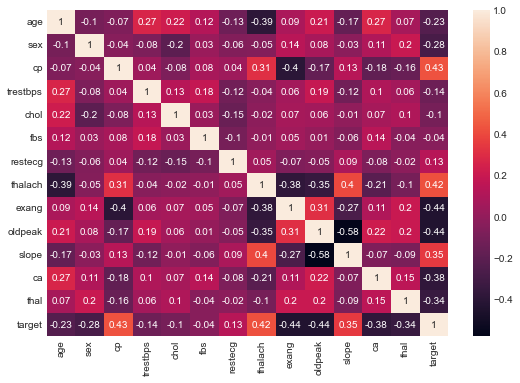

In [9]:
correlation_matrix = heart_df.corr().round(2)
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

Reducing the diagonal values since they indicate the relationship between ownself.Again upper/lower triangle can be reduced since they means the same relationships


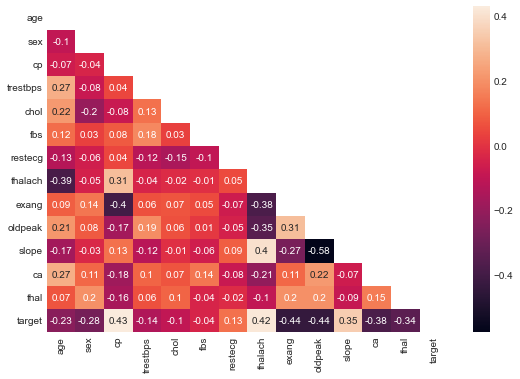

In [10]:
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

Here, Tends to 0(eg:-0.4) is weakly related 

and tends to +/-1(eg: 0.7) means weakly related.

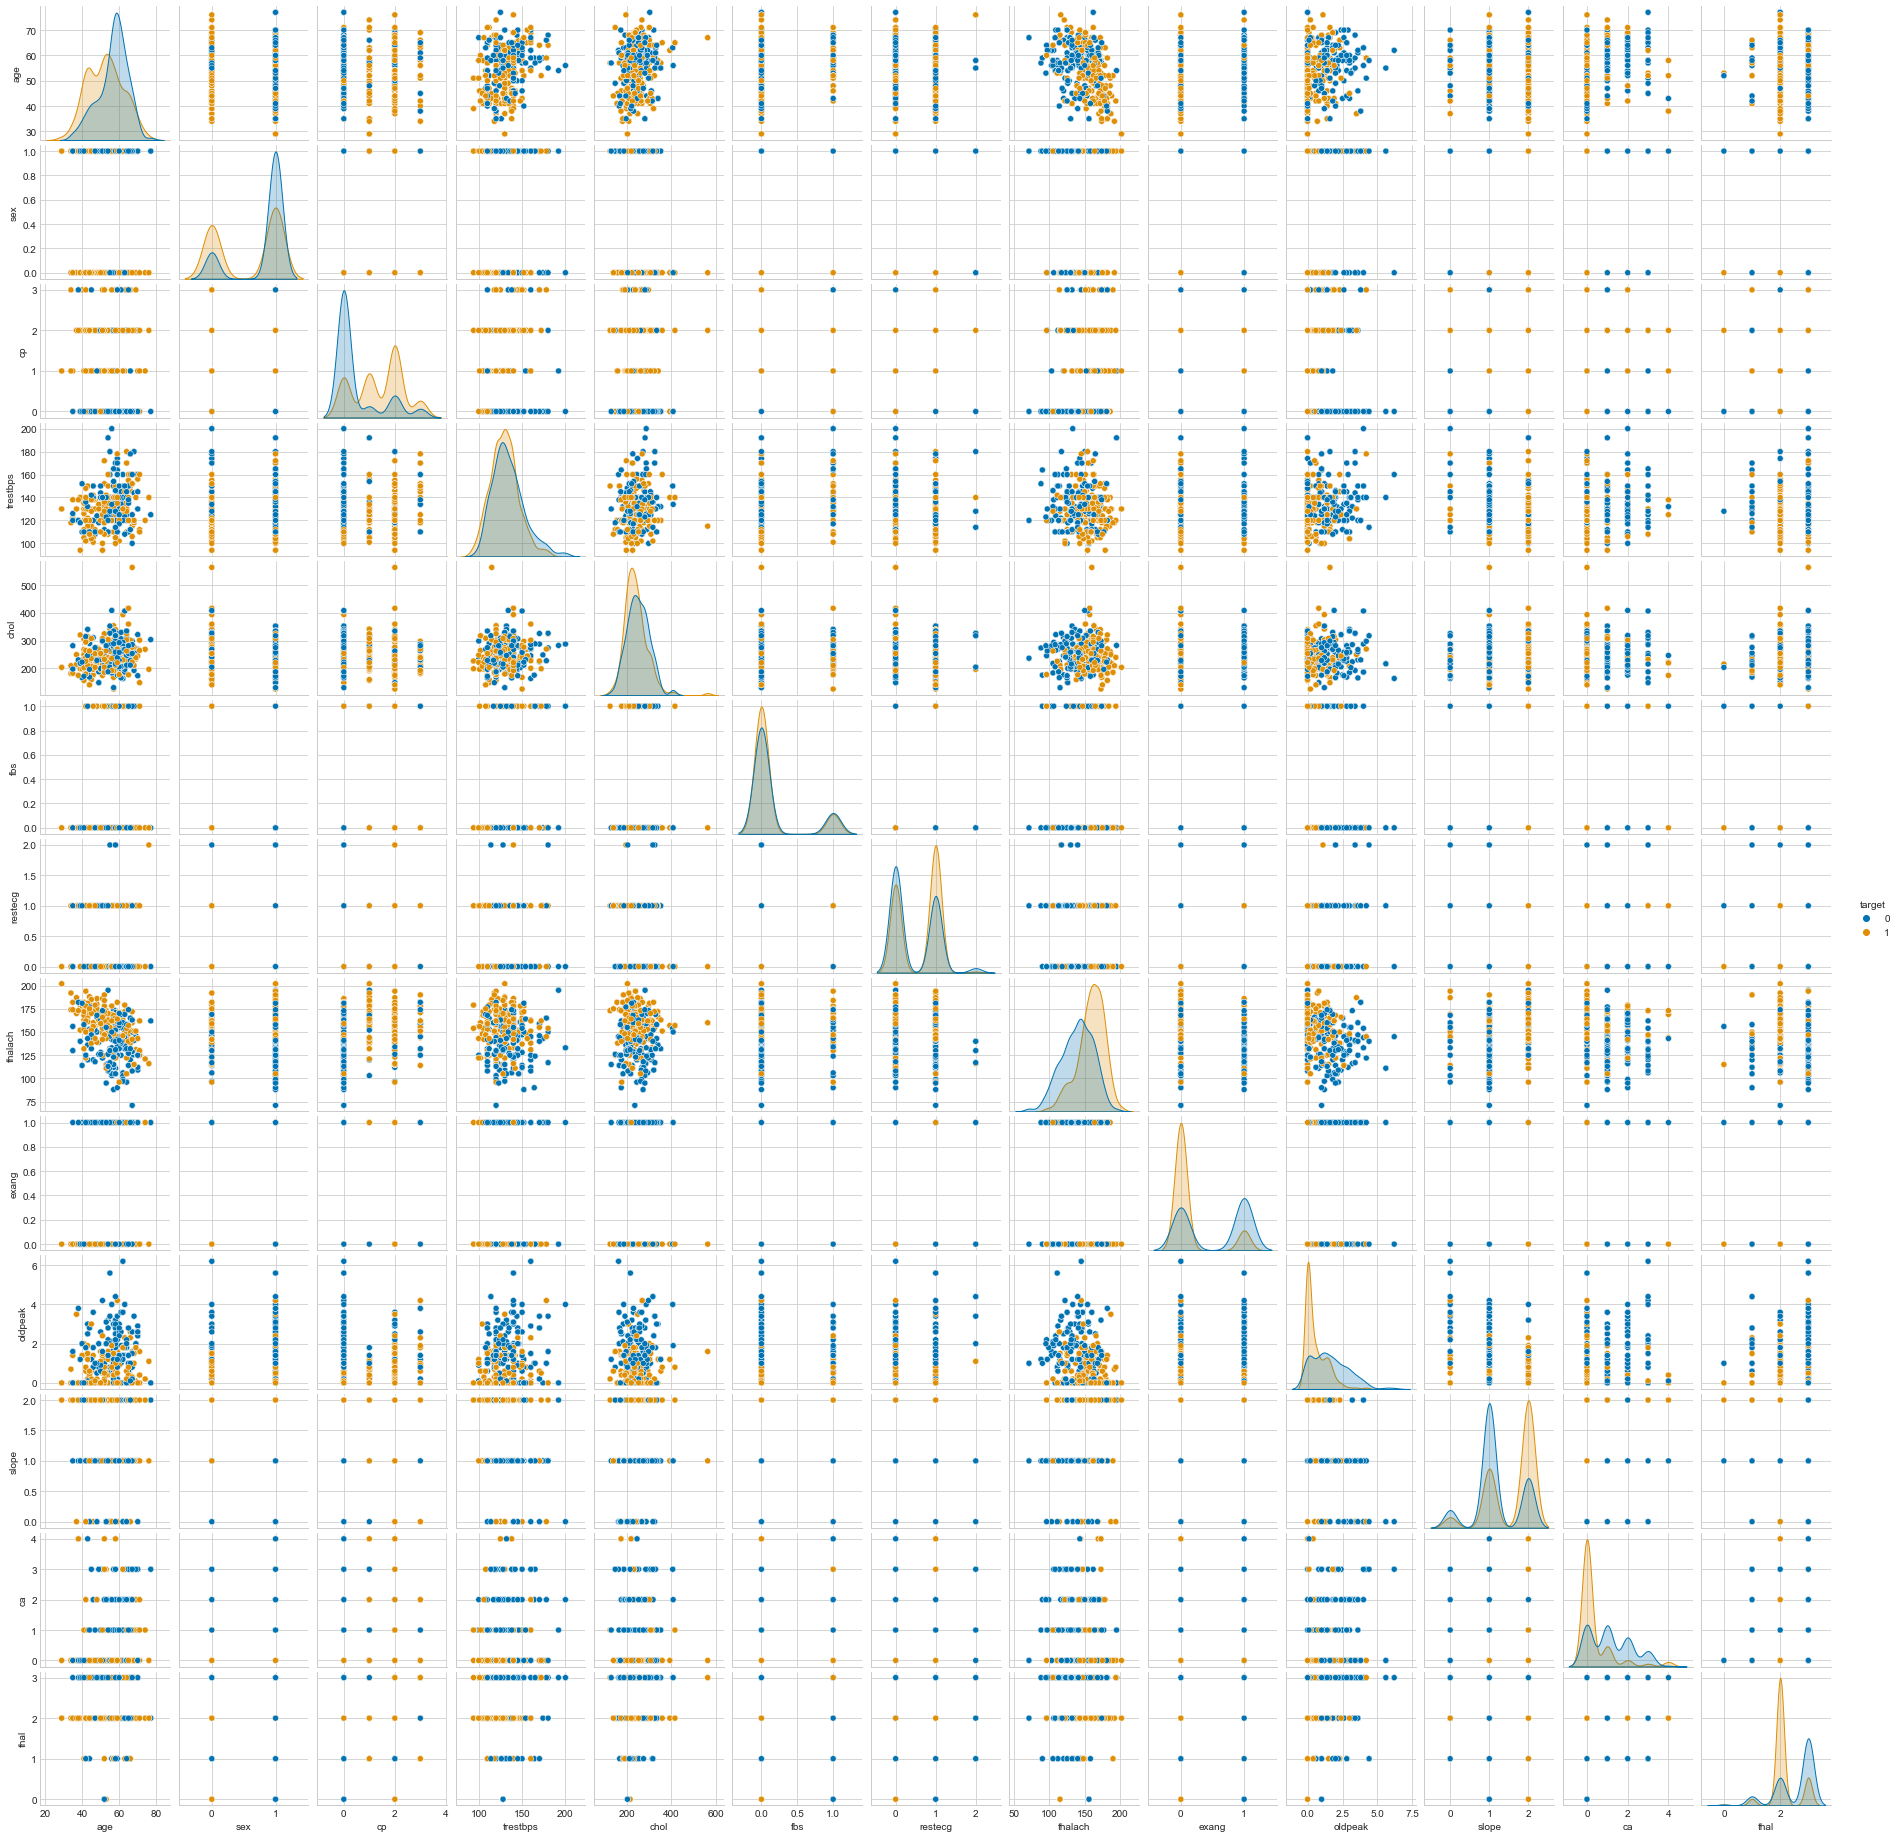

In [11]:
# let's create pairplot to visualise the data for each pair of attributes
sns.pairplot(heart_df, hue="target",height=2, palette = 'colorblind');

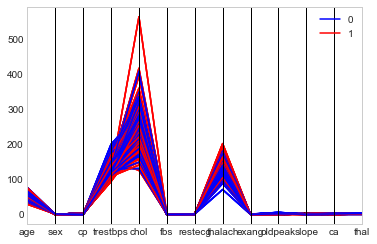

In [12]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(heart_df, "target", color = ['blue', 'red']);
